# Sentimental analysis using NLP

**Import Libraries:**

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


**Load the Training and Testing Datasets**

In [3]:
train_data = pd.read_csv('Train.csv') 
test_data = pd.read_csv('Test.csv')    

In [4]:
print(train_data.head)

<bound method NDFrame.head of                                                     text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]>


In [5]:
print(test_data.head)

<bound method NDFrame.head of                                                    text  label
0     I always wrote this series off as being a comp...      0
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2     This movie was so poorly written and directed ...      0
3     The most interesting thing about Miryang (Secr...      1
4     when i first read about "berlin am meer" i did...      0
...                                                 ...    ...
4995  This is the kind of picture John Lassiter woul...      1
4996  A MUST SEE! I saw WHIPPED at a press screening...      1
4997  NBC should be ashamed. I wouldn't allow my chi...      0
4998  This movie is a clumsy mishmash of various gho...      0
4999  Formula movie about the illegitimate son of a ...      0

[5000 rows x 2 columns]>


**Preprocess the Data**

In [6]:
train_data = train_data.dropna()
test_data = test_data.dropna()
X_train = train_data['text']  
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']


**TF-IDF Vectorization**

In [7]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(f"TF-IDF shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF shape (test): {X_test_tfidf.shape}")

TF-IDF shape (train): (40000, 5000)
TF-IDF shape (test): (5000, 5000)


**Training the Model**

In [9]:
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


**Accuracy score**

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.10%


**Evaluate the Model**


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2495
           1       0.88      0.90      0.89      2505

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



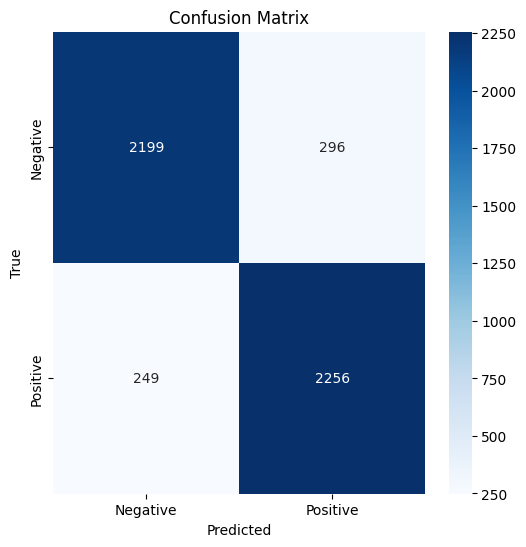

In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Predicting for new reviews**

In [14]:
def predict_sentiment(review_text):
    review_tfidf = tfidf.transform([review_text])
    sentiment = model.predict(review_tfidf)[0]
    return "Positive" if sentiment == 1 else "Negative"

new_review=input()
print(f"Sentiment: {predict_sentiment(new_review)}")


Sentiment: Positive
